# Обучение модели градиентным спуском
---
Привет! Сегодня мы изучим новый способ обучения модели, используя градиентный спуск, о котором я говорил с одном из своих предыдущих уроков.
Поэтому сначала вспомним предыдущую теорию.
В случае многомерной линейной регрессии решение аналитической задачи имеет вид: $$\overline w  = {\left( {{X^T}X} \right)^{ - 1}} \cdot {X^T}\overline y $$
Однако у такого решения есть ряд недостатков:
* Сложность матричного перемножения увеливичивается в 10^3=1000 раз при увеличении размерности нашей матрицы лишь в 10 раз.
* Неустойчивость - не для каждой матрицы можно найти нормально обратную матрицу алгоритмами.
Про Неустойчивость могут возникнуть у вас вопросы, но давайте На практике как раз и проверим, что за неустойчивость.
К примеру, у нас есть вот такая матрица:
$${X^T}X = \left[ {\begin{array}{*{20}{c}}
  5&{25} \\ 
  2&{10} 
\end{array}} \right]$$

In [4]:
import numpy as np
X=np.array([[5, 25],[2,10]])
print(X)
#Xt=np.linalg.inv(X)   #inv-inverse. означает обратную матрицу
print("Если вы запустите операцию выше, то вы получите ошибку 'Singular matrix'.")

[[ 5 25]
 [ 2 10]]
Если вы запустите операцию выше, то вы получите ошибку 'Singular matrix'.


Но что нам делать? Как нам в таком случае решить задачу? Что ж, вопрос хороший, и ученые нашли для него выход. Найти точное решение не получится, но оно нам на самом деле и не нужно, мы можем, используя численные методы, просто взять и найти приближенное решение. Тогда нам не придется находить обратную матрицу, но нам придется тогда считать производные для *градиента*, ведь мы будем использовать ***Градиентный спуск!***
## Градиентный спуск
В библиотеке sklearn уже есть класс, который реализует метод обучения машины, по шагам, используя градиентный спуск. Это sklearn.linear_model.SGDRegressor

Сегодня мы не будем использовать базу данных, но зато мы сами создадим несколько точек для построение в итоге прямого графика


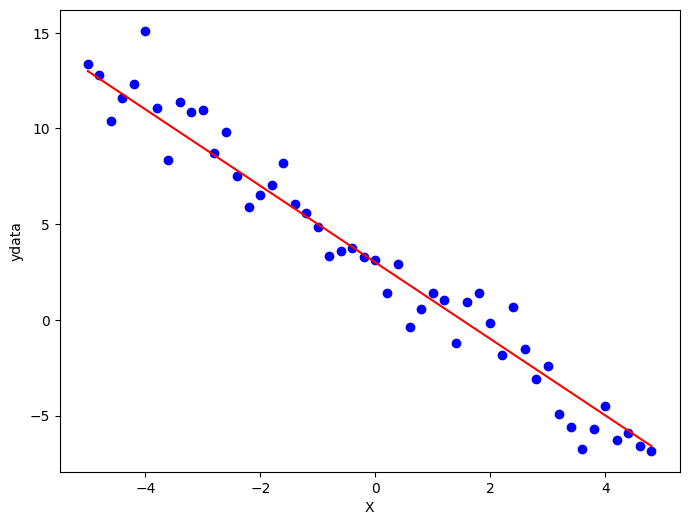

In [124]:
import pandas as pd
import matplotlib.pyplot as plt
# Для испльзования регрессии
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from scipy.spatial import distance
%matplotlib inline
print("Сегодня мы не будем использовать базу данных, но зато мы сами создадим несколько точек для построение в итоге прямого графика")
x = np.arange(-5.0, 5.0, 0.2)
y = -2*(x) + 3
y_noise = 1.5 * np.random.normal(size=x.size)
ydata = y + y_noise
plt.figure(figsize=(8,6))
plt.plot(x, ydata,  'bo')
plt.plot(x,y, 'r') 
plt.ylabel('ydata')
plt.xlabel('X')
plt.show()

Запустим шажки градиентного спуска (те самые итерации). Для градиентного спуска мы используем готовый класс SGDRegressor: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html . Класс принимает следующие параметры


* learning_rate='constant' используем самую простую модификацию спуска из нескольких возможных (см. документацию)
* eta0 - шаг градиентного спуска, в формуле мы его обозначали буквой $\alpha$
* fit_intercept - чтобы обучить коэффициент при "свободном члене" линейной регрессии
* random_state - этот параметр встречали ранее в этом модуле, он нужен для воспроизводимости вычислений

---
Функция `partial_fit()`, которую мы вызываем в коде, делает одну итерацию градиентного спуска.

По оси $oX$ отложим количество итераций, а по оси $oY$ - значение метрики качества *MSE*, которое получили на  валидации

На каждом шаге градиентного спуска мы должны понять, нужно ли нам останавливаться
[0.39857253 0.08015197]
Итерации остановлены на шаге 18


Text(0, 0.5, 'rmse')

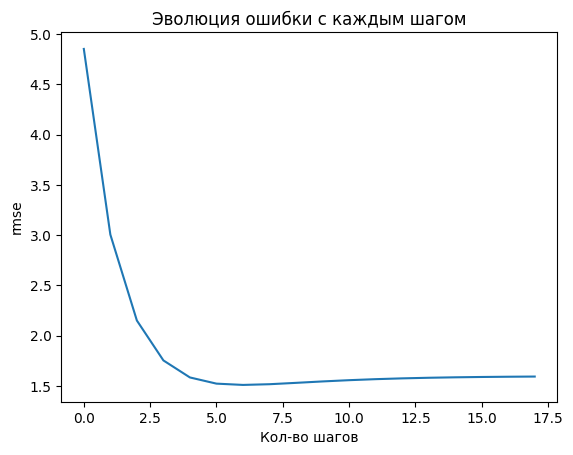

In [127]:
x = x.reshape(-1, 1) # превращаем X из простого массива в вектор-столбец
X_train,X_valid,y_train,y_valid=train_test_split(x,ydata,test_size=0.2,random_state=10)
sgd_regressor=SGDRegressor(learning_rate='constant', eta0=0.008, fit_intercept=True, random_state=42)
print("На каждом шаге градиентного спуска мы должны понять, нужно ли нам останавливаться")
w_current=np.random.random(2) # Какое-то случайное значение весов
epsilon=0.0001 # точность, которую мы хотим достичь
weight_evolution=[] # чтобы посмотреть, как меняются весы
rmse_evolution=[] # чтобы смотреть, как ошибка меняется
print(w_current)
for step in range(800): # надеемся, что за 800 шагов мы точно дойдем до минимума
    sgd_regressor=sgd_regressor.partial_fit(X_train,y_train) # fit_partial делает только 1 шаг линейной регрессии
    weight_evolution.append(
        distance.euclidean(w_current, sgd_regressor.coef_) # показывает как сильно сдвинулись веса
    )
    if weight_evolution[-1]<epsilon: #Условие остановки
        print(f"Итерации остановлены на шаге {step}"); break
    rmse_evolution.append(
        mean_squared_error(y_valid,sgd_regressor.predict(X_valid))
    )
    w_current= sgd_regressor.coef_.copy() # copy чтобы мы не меняли вдруг ничего внутри регрессора
plt.plot(range(step), rmse_evolution)
plt.title("Эволюция ошибки с каждым шагом")
plt.xlabel("Кол-во шагов")
plt.ylabel('rmse')

Этот график показывает эфолюции ошибки. Как видите, с каждым шагом наша машина, обучаясь, получает всё более точные предсказания!

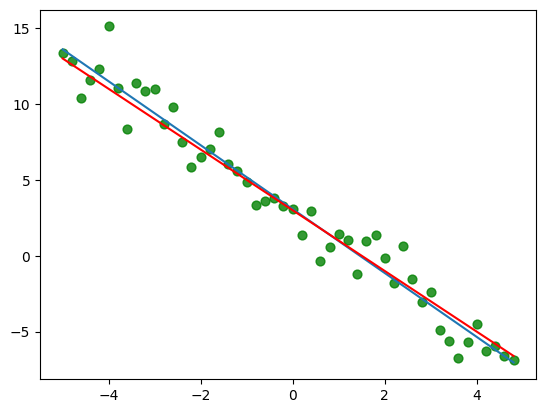

In [128]:
x_linspace = np.linspace(x.min(), x.max(), num=100)

y_linspace= sgd_regressor.predict(x_linspace.reshape(-1,1))

plt.plot(x_linspace, y_linspace)
plt.scatter(x, ydata, 40, 'g', 'o', alpha=0.8, label='data')
plt.plot(x,y, 'r') 
plt.show()

Как видите, прямая почти никак не отличается от изначальной! (Она бы вообще не отличалась от нее, но мы добавили функцию random при разбросе точек, поэтому погрешность всё равно есть).
Смысл весь лишь в том, что мы не использовали никаких сложных матричных форм для вычислений, и значит и метод будет работать супер-быстро, независимо от количества данных! 
---
- *Еще одним плюсом является тот факт, что мы обучали модель не сразу используя все данные, а по шагам, в каждой точке отдельно.*

Когда же стоит использовать градиентный спуск? Логично, когда данных слишком много. Также, если нам нужно регулировать точность выходных значений самостоятельно, то градиентный спуск нам в этом сильно поможет. А на сегодня у меня всё, выпуск получился не очень большим, но оно и к лучшему